<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Mini_project_1_Machine_Learning_for_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mental Health in Tech Survey.zip to Mental Health in Tech Survey.zip


In [9]:
import zipfile

with zipfile.ZipFile("Mental Health in Tech Survey.zip", 'r') as zip_ref:
    zip_ref.extractall("mental_health_data")

In [10]:
import os

os.listdir("mental_health_data")

['Mental Health in Tech Survey']

In [12]:
os.listdir("mental_health_data/Mental Health in Tech Survey")

['survey.csv']

In [13]:
df = pd.read_csv("mental_health_data/Mental Health in Tech Survey/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


1. Checking missing values:

In [14]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


2. Dropping irrelevant columns:

In [15]:
df = df.drop(columns=[
    'Timestamp', 'state', 'self_employed', 'comments',
    'work_interfere', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'leave', 'no_employees', 'treatment', 'family_history',
    'mental_health_interview', 'phys_health_consequence',
    'coworkers', 'supervisor', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'
], errors='ignore')

In [16]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   mental_health_consequence  1259 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.5+ KB


3. Age group distribution, Cleaning:

In [17]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

In [18]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 100],
                        labels=['15-25', '26-35', '36-45', '46-55', '56+'])

<ipython-input-19-84b1aba17318>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df.groupby('AgeGroup')['mental_health_consequence'].value_counts(normalize=True).unstack()


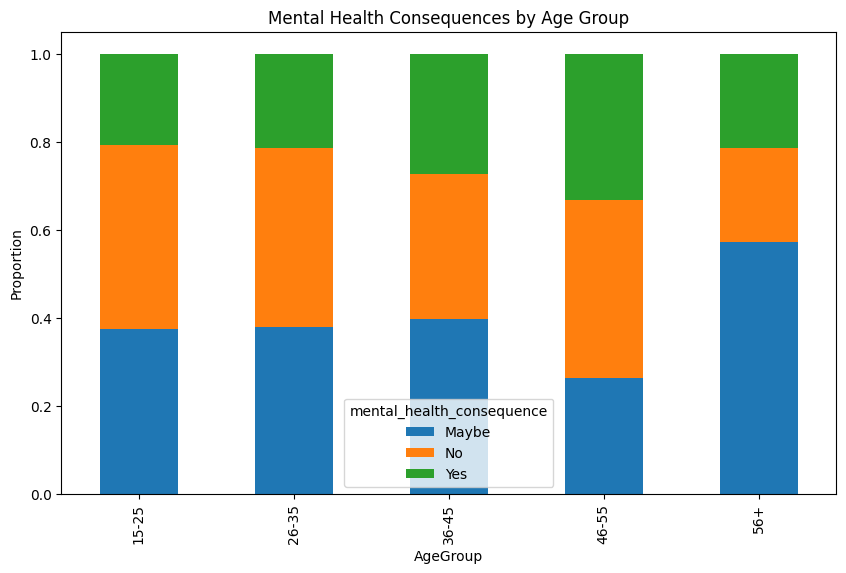

In [19]:
import matplotlib.pyplot as plt

age_dist = df.groupby('AgeGroup')['mental_health_consequence'].value_counts(normalize=True).unstack()
age_dist.plot(kind='bar', stacked=True, figsize=(10,6), title='Mental Health Consequences by Age Group')
plt.ylabel("Proportion")
plt.show()

4. Data by gender:

In [23]:
def clean_gender(g):
    g = g.lower()
    if 'male' in g:
        return 'Male'
    elif 'female' in g:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

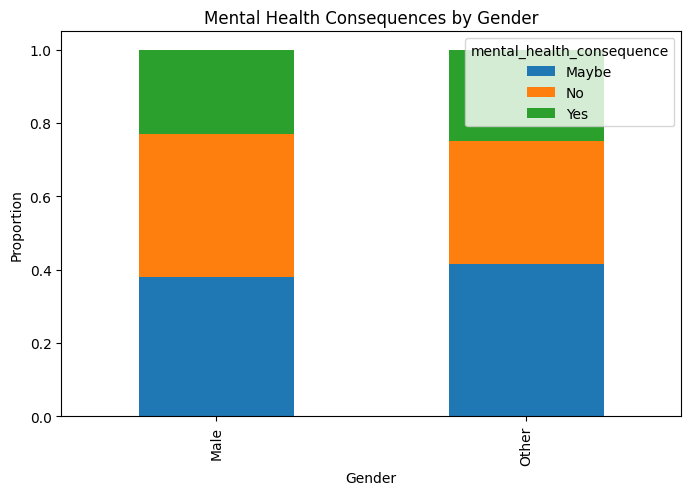

In [24]:
gender_counts = df.groupby('Gender')['mental_health_consequence'].value_counts(normalize=True).unstack()
gender_counts.plot(kind='bar', stacked=True, figsize=(8,5), title='Mental Health Consequences by Gender')
plt.ylabel("Proportion")
plt.show()

5. Countries with highest and lowest reported cases:

In [25]:
country_issues = df.groupby('Country')['mental_health_consequence'].value_counts(normalize=True).unstack().fillna(0)

if 'Yes' in country_issues.columns:
    highest = country_issues['Yes'].sort_values(ascending=False)
    print("🌍 Countries with Highest Mental Health Issue Reports:\n")
    print(highest.head(5))

    print("\n🌍 Countries with Lowest Mental Health Issue Reports:\n")
    print(highest.tail(5))

🌍 Countries with Highest Mental Health Issue Reports:

Country
Spain       1.0
Slovenia    1.0
Japan       1.0
Hungary     1.0
Greece      1.0
Name: Yes, dtype: float64

🌍 Countries with Lowest Mental Health Issue Reports:

Country
Poland      0.0
Romania     0.0
Sweden      0.0
Thailand    0.0
Uruguay     0.0
Name: Yes, dtype: float64
